In [1]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import numpy as np
from rigid_registration import tailor_registration

In [2]:
print("SimpleITK Version:", sitk.Version())

SimpleITK Version: SimpleITK Version: 2.2.1 (ITK 5.3)
Compiled: Dec  2 2022 12:24:46



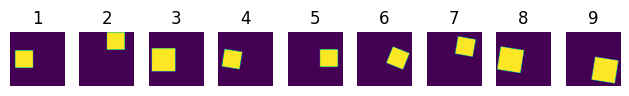

Sq1:Fixed image, Sq2:Translation 2D, Sq3:Isometric scaling, Sq4:Rotation, Sq5:Translation 1D
Sq6:Tanslation1D + Rotation, Sq7:Translation 2D + Rotation, Sq8:scaling +Rotation, Sq9:Rotation + Scaling + Translation


In [3]:
root = "/home/umcg/Desktop/Teaching/ImageRegistration/"
sqs = ["Square1.jpg","Square2.jpg","Square3.jpg","Square4.jpg","Square5.jpg","Square6.jpg","Square7.jpg","Square8.jpg","Square9.jpg"]
for i in range(len(sqs)):
    image_sitk = sitk.ReadImage(sqs[i], sitk.sitkFloat32)
    image_array = sitk.GetArrayFromImage(image_sitk)
    plt.subplot(1,9,i+1),plt.imshow(image_array),plt.axis('off')
    plt.title(i+1)
    
plt.tight_layout()
plt.show()
    
print("Sq1:Fixed image, Sq2:Translation 2D, Sq3:Isometric scaling, Sq4:Rotation, Sq5:Translation 1D")
print("Sq6:Tanslation1D + Rotation, Sq7:Translation 2D + Rotation, Sq8:scaling +Rotation, Sq9:Rotation + Scaling + Translation")

In [9]:
fixed_image_path = "Square1.jpg"
moving_image_path = "Square2.jpg"

#Load
fixed_image = sitk.ReadImage(fixed_image_path, sitk.sitkFloat32)
moving_image = sitk.ReadImage(moving_image_path, sitk.sitkFloat32)
fixed_array = sitk.GetArrayFromImage(fixed_image)
moving_array = sitk.GetArrayFromImage(moving_image)

Image dimensions: Image:  (512, 512)  Image 2: (512, 512)


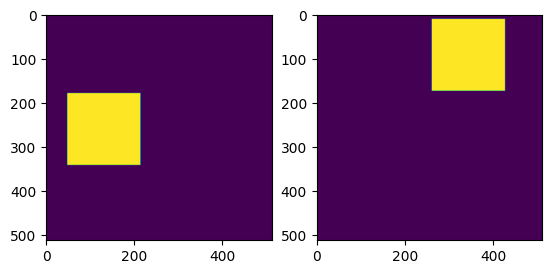

In [10]:
print("Image dimensions: Image: ",fixed_array.shape," Image 2:", moving_array.shape)
plt.subplot(121),plt.imshow(fixed_array)
plt.subplot(122),plt.imshow(moving_array)
plt.show()

In [11]:
transf_spec = "Translation2D"
center_spec = "Geometry"  # Geometry or Moments
metric_spec = "MeanSquares"  # "Correlation" or "MatesMutualInformation" or "MeanSquares"
optimizer = "RegularStepGradientDescent"  # GradientDescent" or "RegularStepGradientDescent"
shift_sepc = "IndexShift"  # "PhysicalShift" or "IndexShift"

#Both Optimizers
iterations_spec=500
lr=1
#ResgularStep Gradient 
minStep=1e-4
gradientT=1e-7
#Gradient Descent
convMinVal =10
convWinSize = 1e-7

#Offset
offset = "Diff" #Fix, Mov, Diff

moved_array, evaluationMetric, final_transform = tailor_registration(fixed_array, moving_array, transf_spec,
                                                                         center_spec, metric_spec, optimizer,
                                                                         shift_sepc, offset, iterations_spec=400,
                                                                         minStep=.00001, gradientT=1e-7)

Final metric value: 0.047186766297459375
Optimizer's stopping condition: RegularStepGradientDescentOptimizerv4: Maximum number of iterations (400) exceeded.


Image dimensions: Image:  (512, 512)  Image 2: (512, 512)


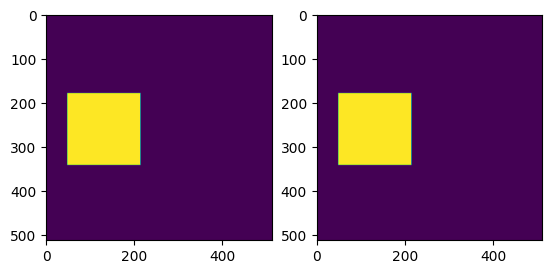

In [12]:
print("Image dimensions: Image: ",fixed_array.shape," Image 2:", moved_array.shape)
plt.subplot(121),plt.imshow(fixed_array)
plt.subplot(122),plt.imshow(moved_array)
plt.show()

In [8]:
print(np.sum(fixed_array)/np.sum(moved_array))

print(np.sum(fixed_array)/np.sum(moving_array))

inf
1.0


/tmp/ipykernel_425986/1566898885.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  print(np.sum(fixed_array)/np.sum(moved_array))
